plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runNoBioPISCES/SOG2D_1h_20041019_20041019_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runNoBioPISCES/SOG2D_1h_20041019_20041019_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
e=int(len(t))#/4)
tt,tz=np.meshgrid(t[0:e],-z[:])
xt,yt=np.meshgrid(lons,lats)
f3=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/mesh_mask.nc')


In [3]:
#print(f3.variables)
print(f2.variables)

OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (101,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (101, 2)
filling off
), ('thetao', <class 'netCDF4._netCDF4.Variable'>
float32 thetao(time_counter, deptht, y, x)
    standard_name: sea_water_pote

/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


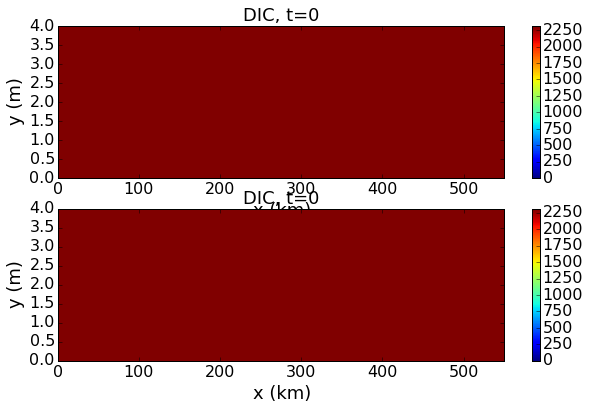

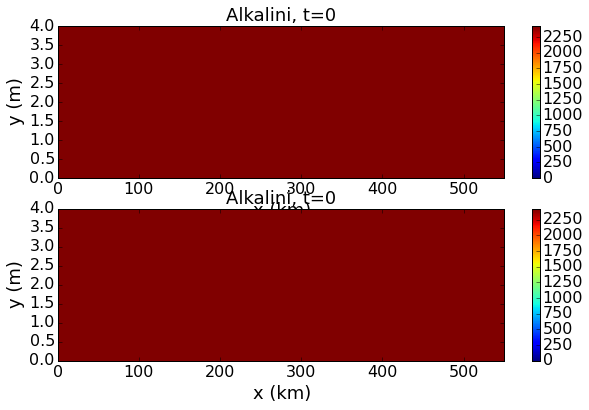

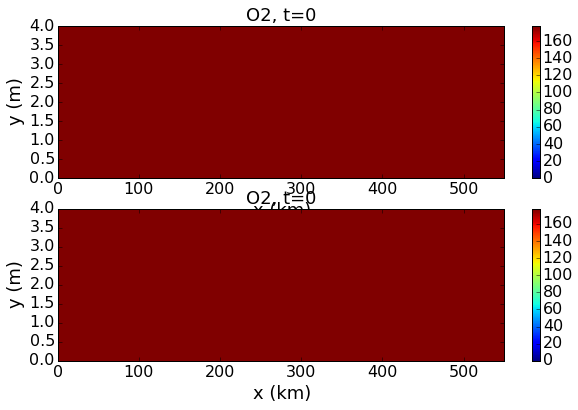

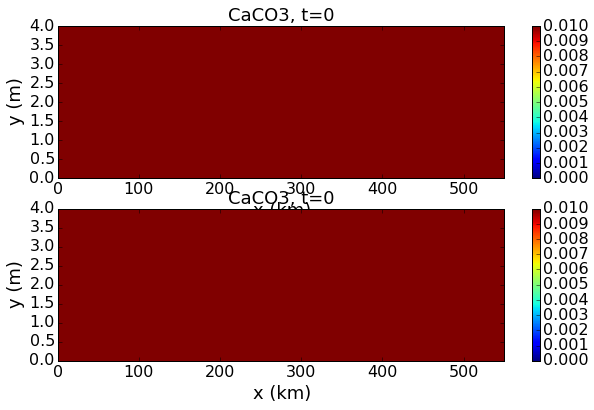

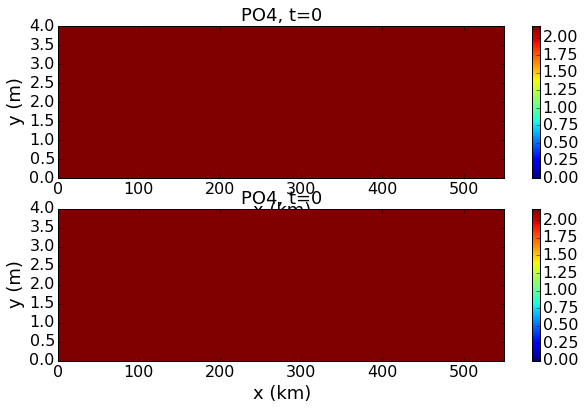

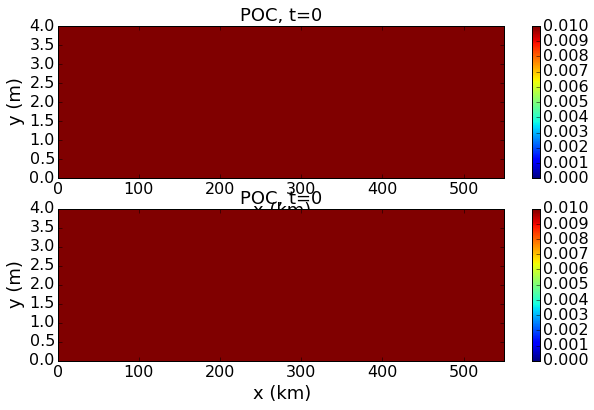

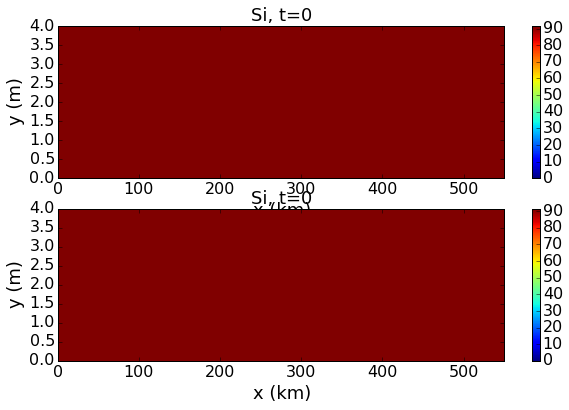

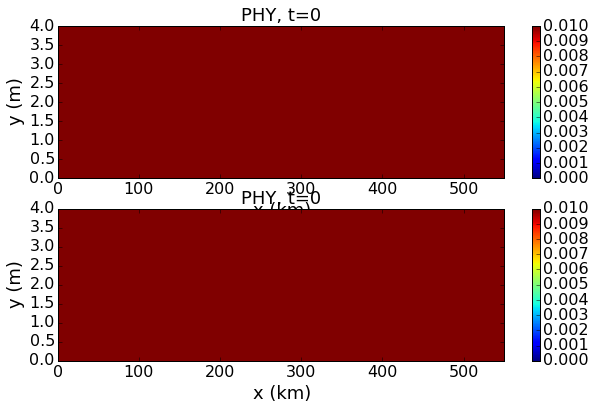

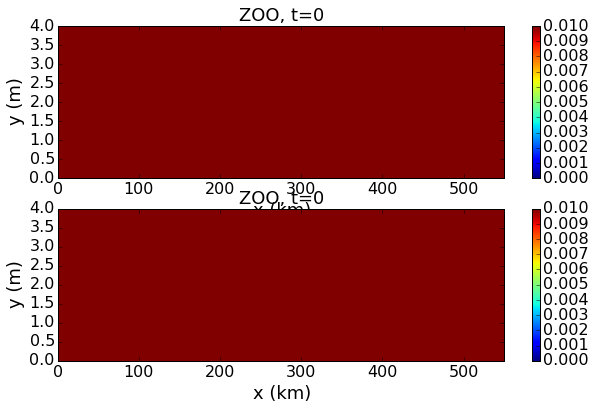

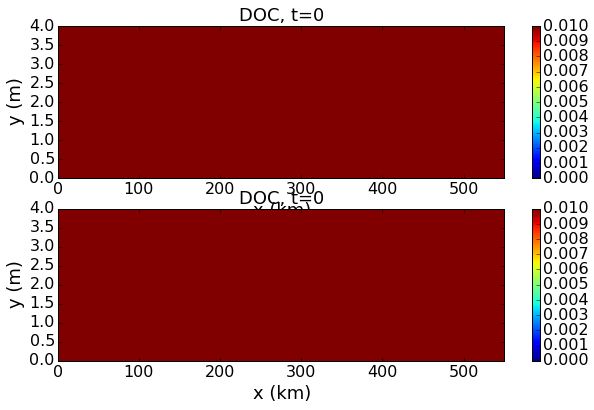

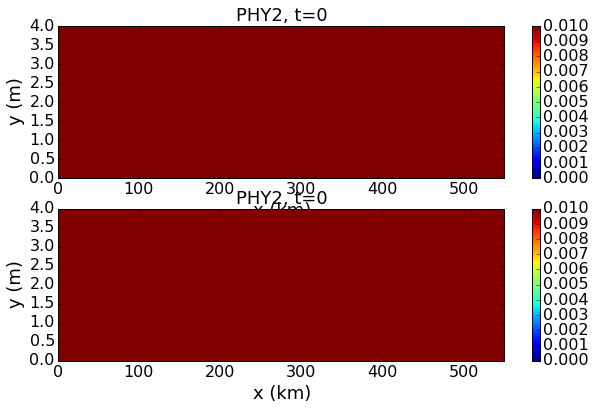

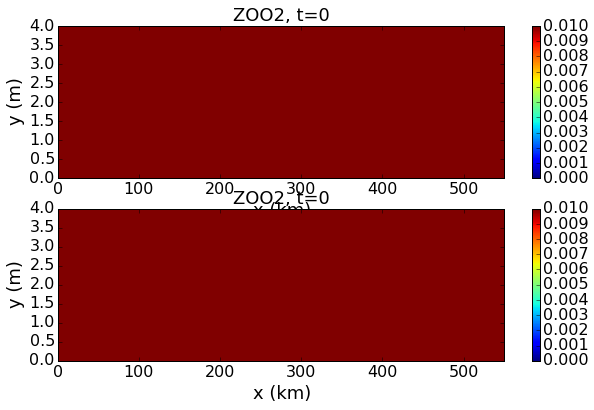

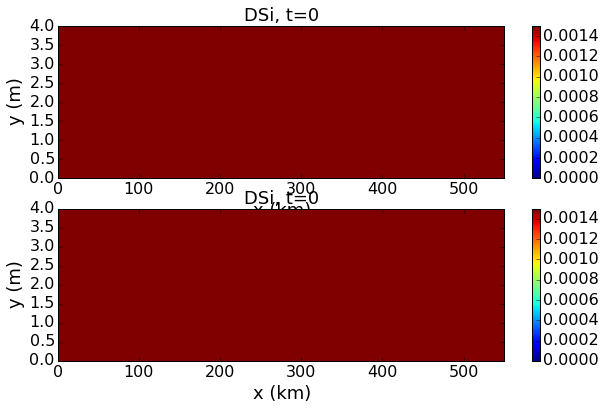

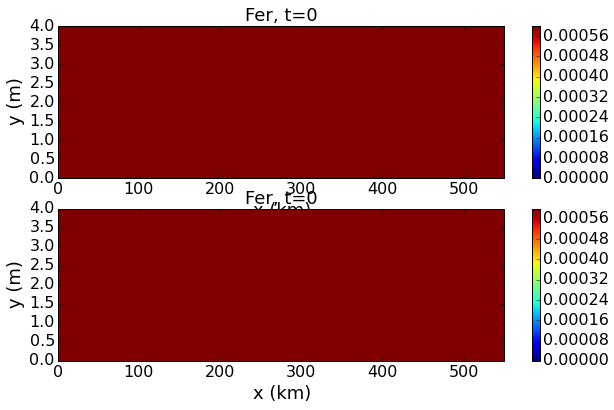

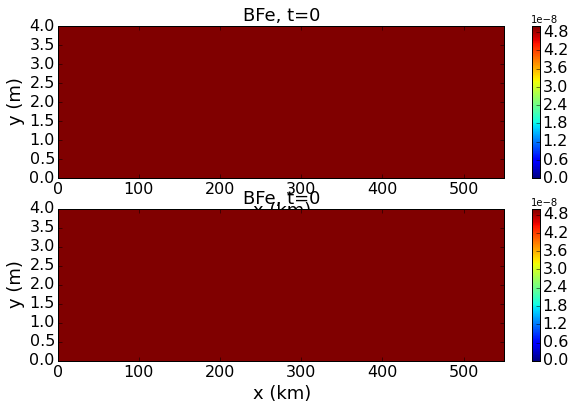

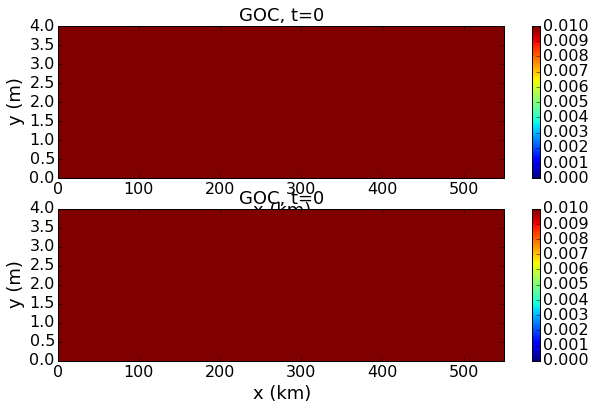

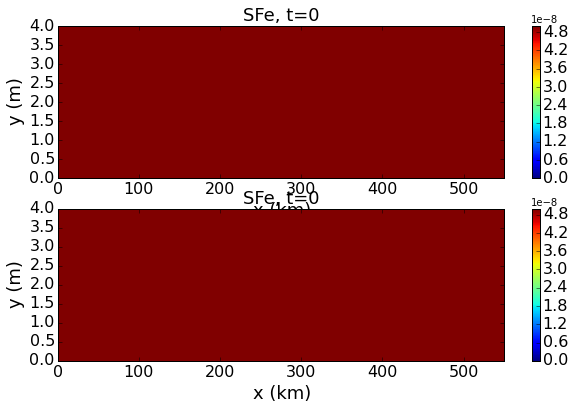

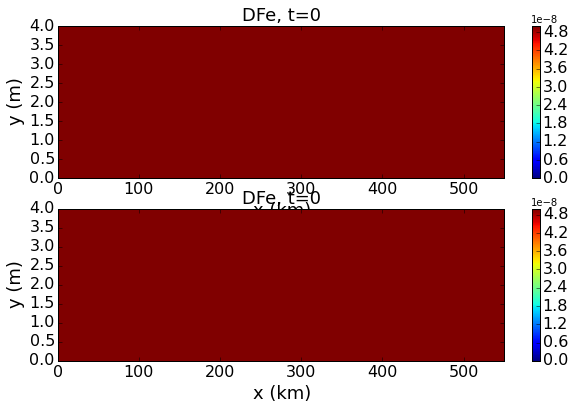

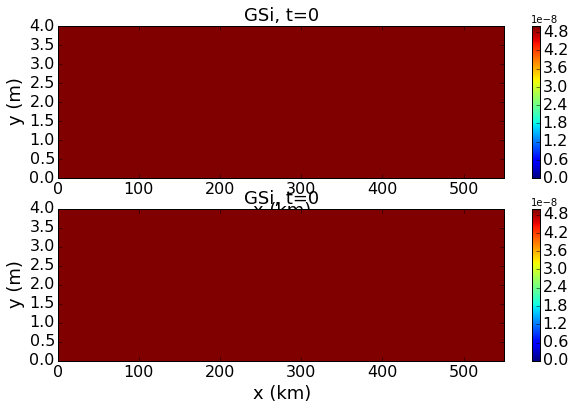

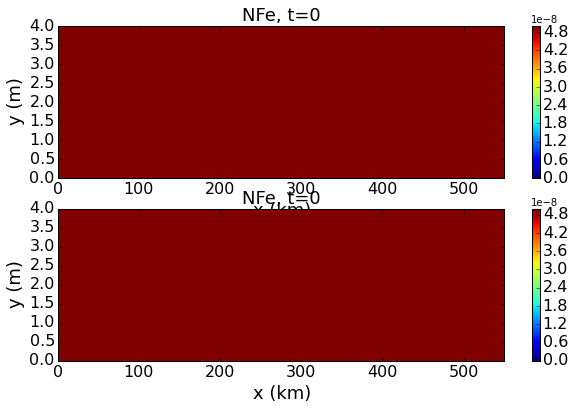

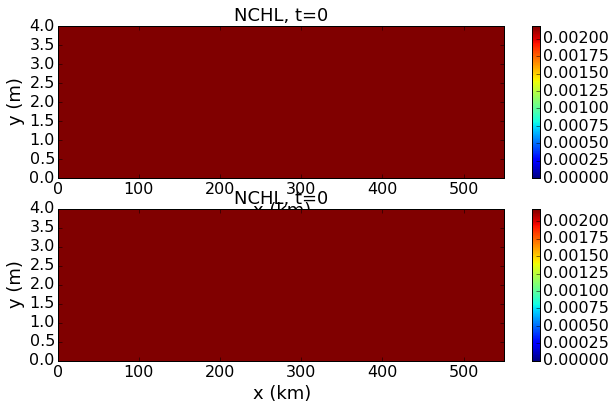

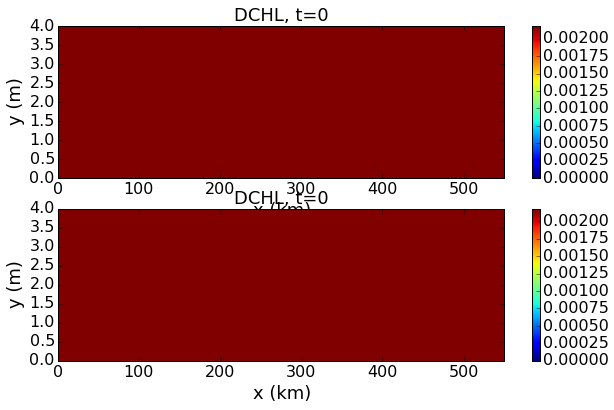

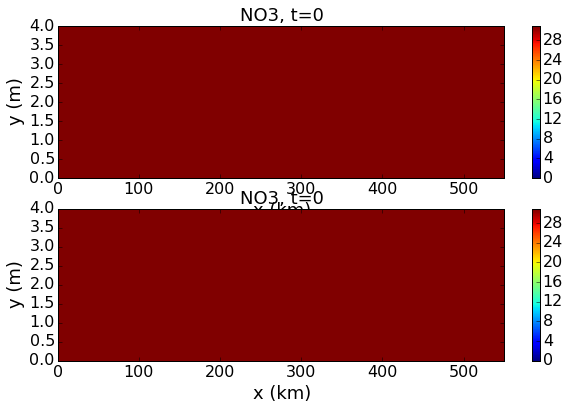

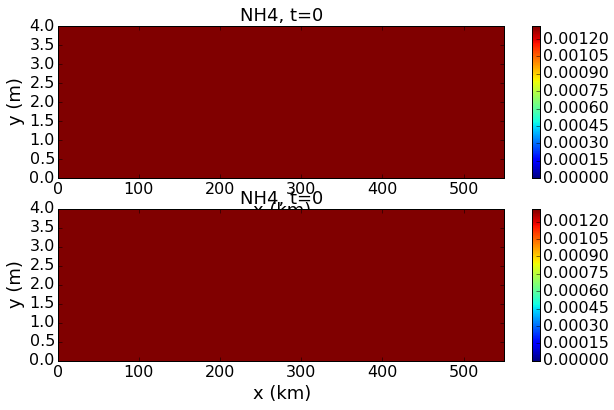

In [4]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        mesh0=axs[0].pcolormesh(xt,yt,f.variables[ik][5,0,:,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[0].axis([0, 550, 0,4])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
                
        mesh1=axs[1].pcolormesh(xt,yt,f.variables[ik][11,0,:,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('y (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[1].axis([0, 550, 0, 4])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

DIC
0.0
Alkalini
0.0
O2
0.0
CaCO3
0.0
PO4
0.0
POC
0.0
Si
0.0
PHY
0.0
ZOO
0.0
DOC
0.0
PHY2
0.0
ZOO2
0.0
DSi
0.0
Fer
0.0
BFe
0.0
GOC
0.0
SFe
0.0
DFe
0.0
GSi
0.0
NFe
0.0
NCHL
0.0
DCHL
0.0
NO3
0.0
NH4
0.0


/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


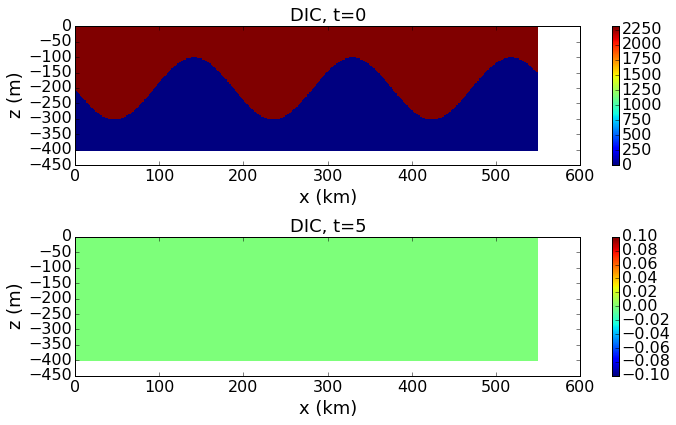

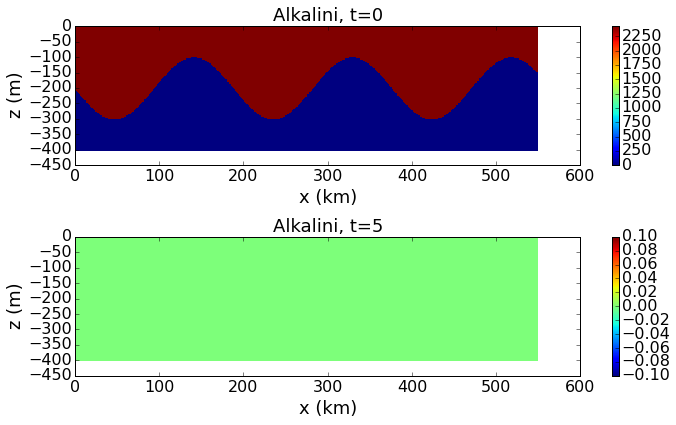

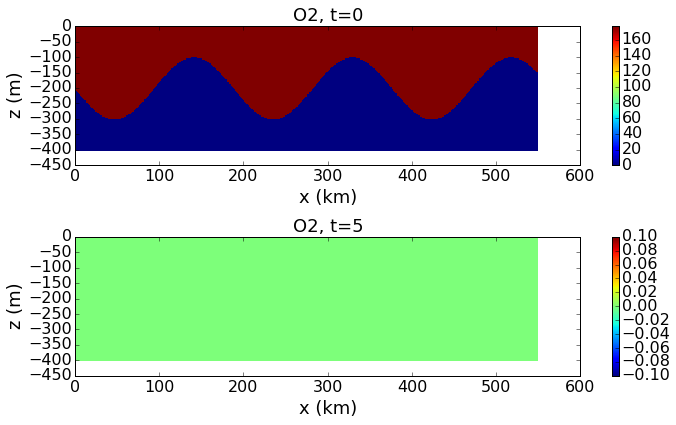

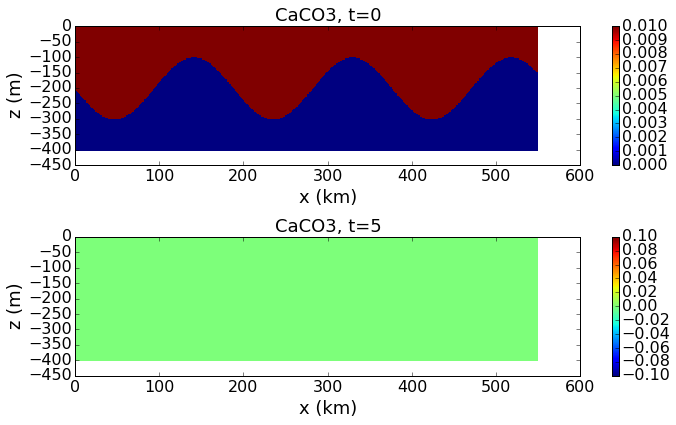

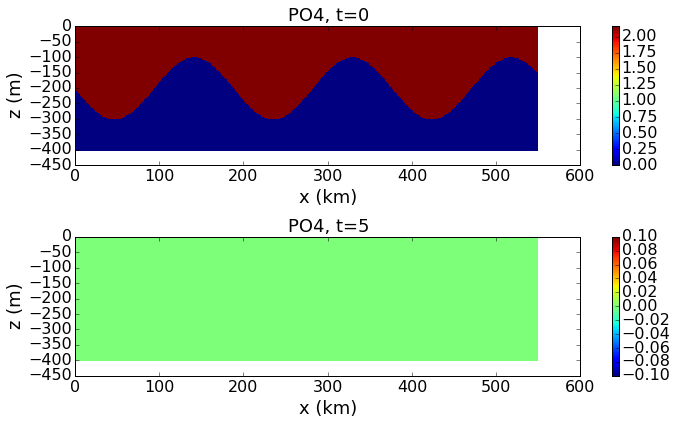

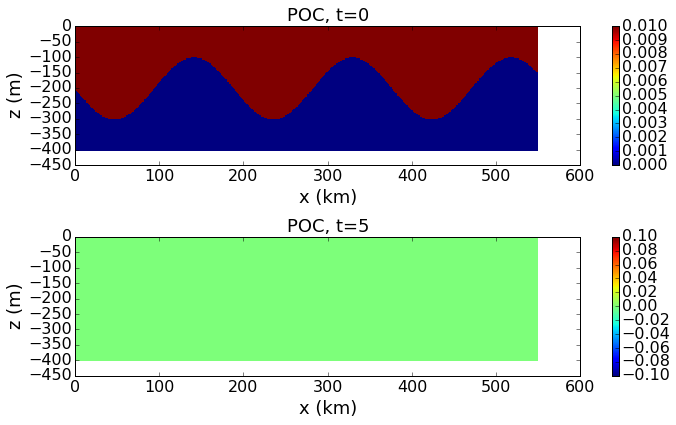

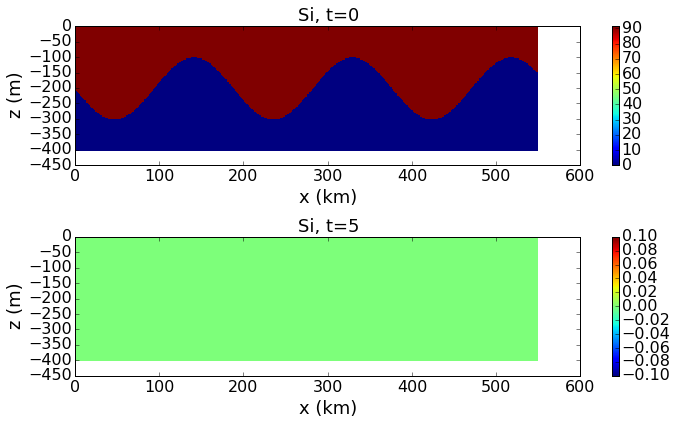

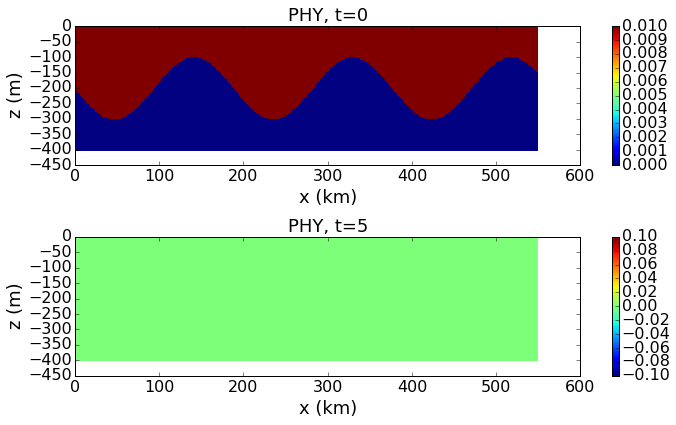

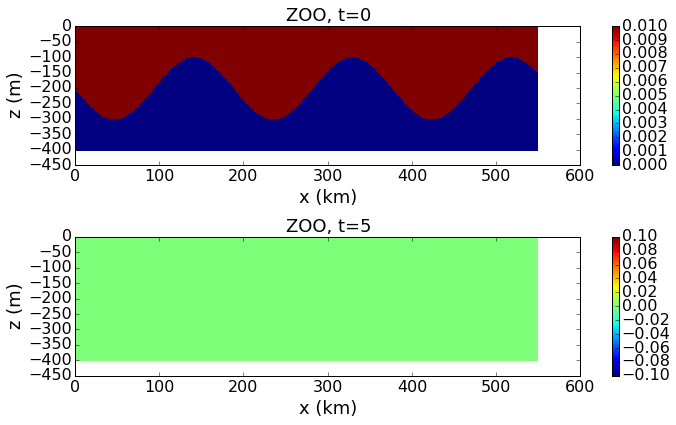

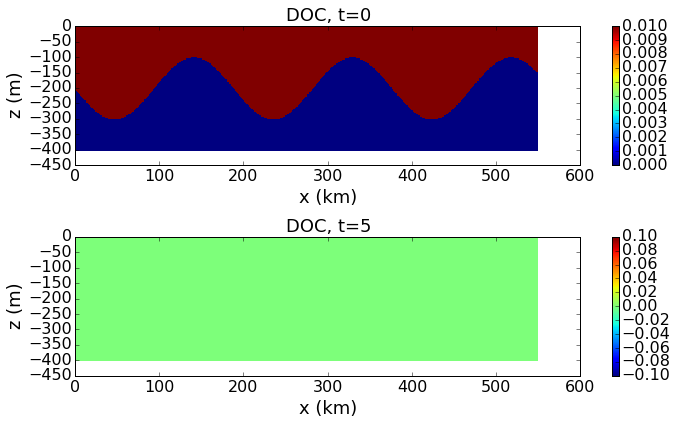

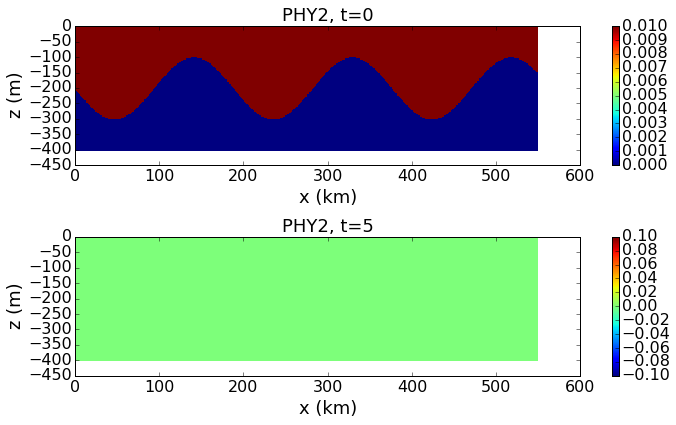

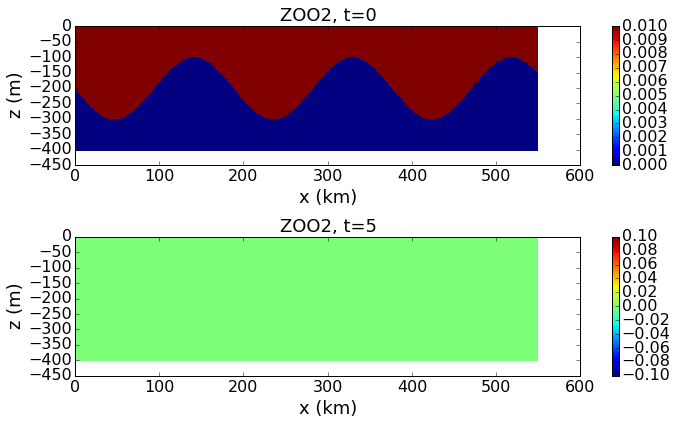

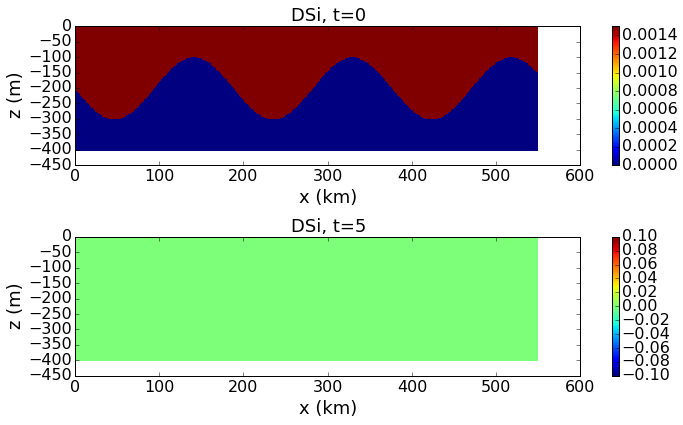

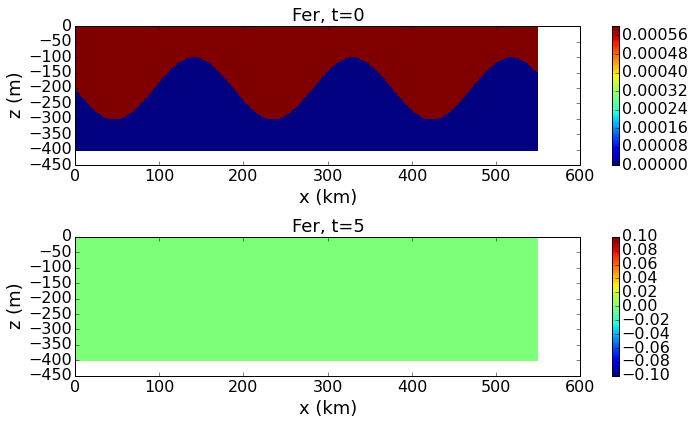

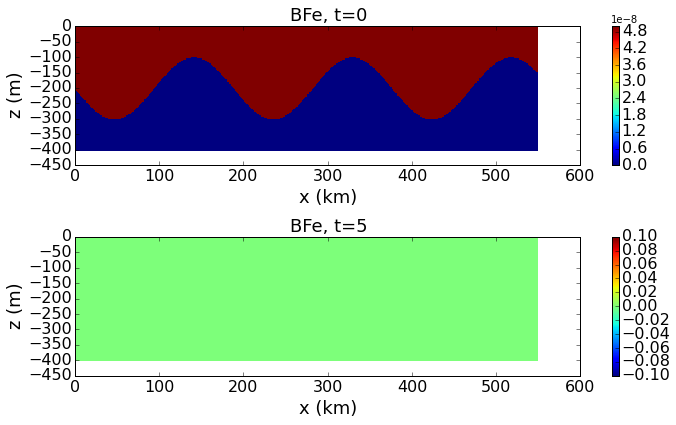

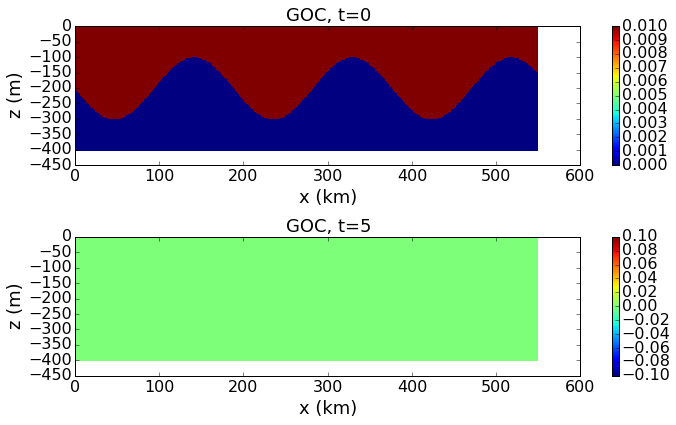

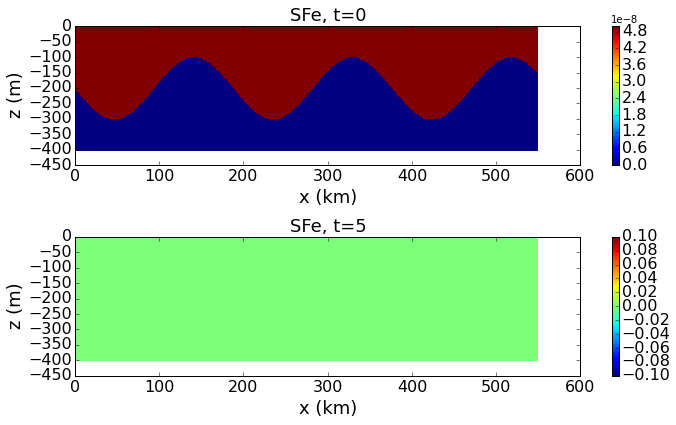

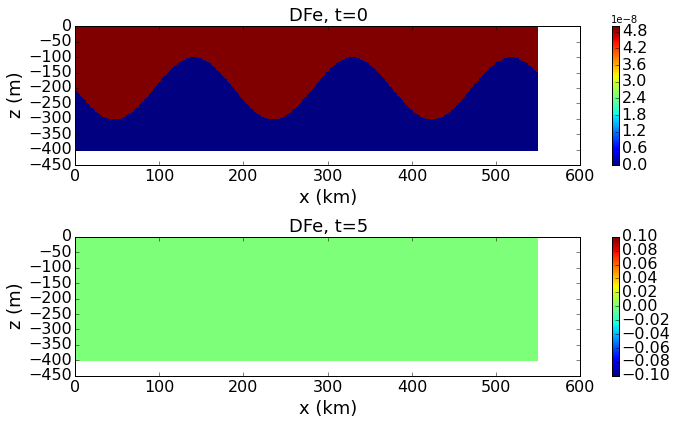

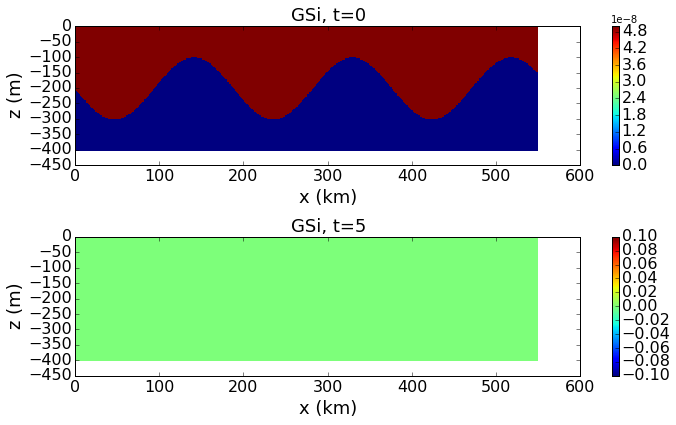

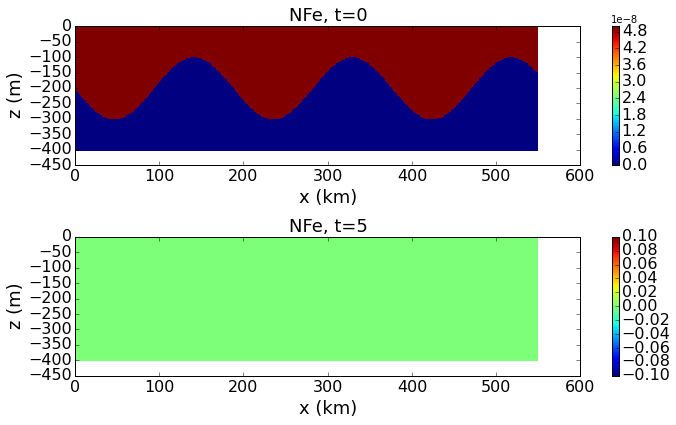

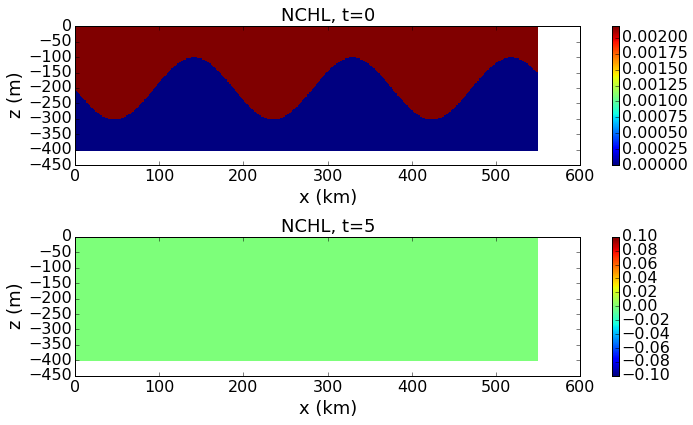

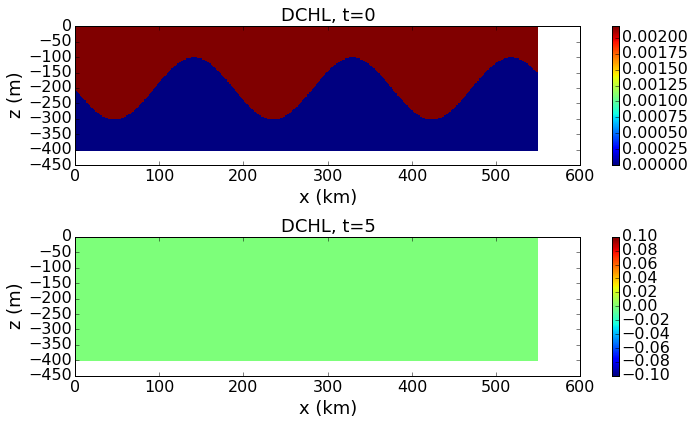

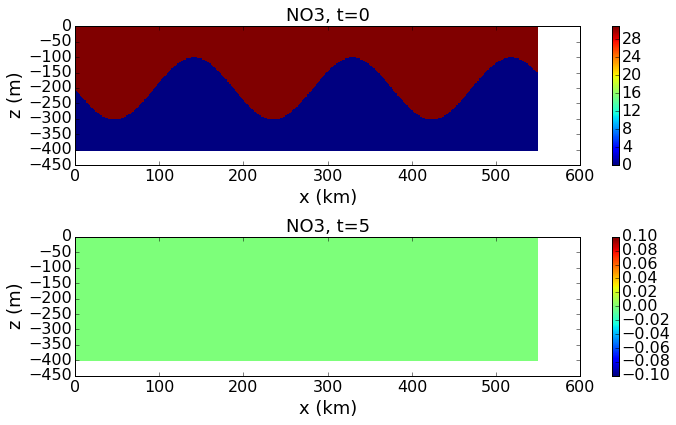

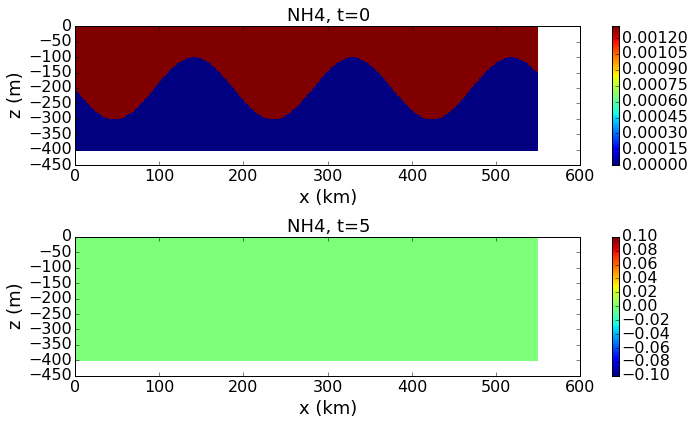

In [10]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        
        lims=np.max(np.abs(f.variables[ik][11,:,5,:]*f3.variables['tmask'][0,:,5,:]-f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:]))
        print(lims)
        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][11,:,5,:]*f3.variables['tmask'][0,:,5,:]-f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:],vmin=-lims,vmax=lims)
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=5', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([0, 550, -50, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [8]:
print(np.min(f.variables['NH4'][11,:,:,:]-f.variables['NH4'][0,:,:,:]))
print(np.max(f.variables['NH4'][11,:,:,:]-f.variables['NH4'][0,:,:,:]))

-1.45719e-05
0.0


DIC0.0
Alkalini0.0
O20.0
CaCO30.0
PO40.0
POC0.0
Si0.0
PHY0.0
ZOO0.0
DOC0.0
PHY20.0
ZOO20.0
DSi0.0
Fer0.0
BFe0.0
GOC0.0
SFe0.0
DFe0.0
GSi0.0
NFe0.0
NCHL0.0
DCHL0.0
NO30.0
NH40.0


/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


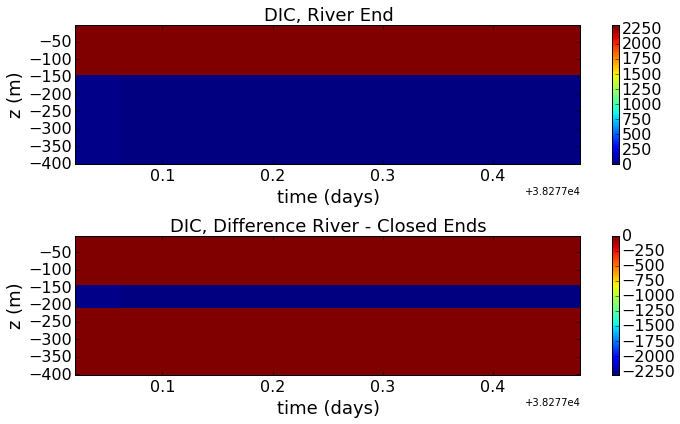

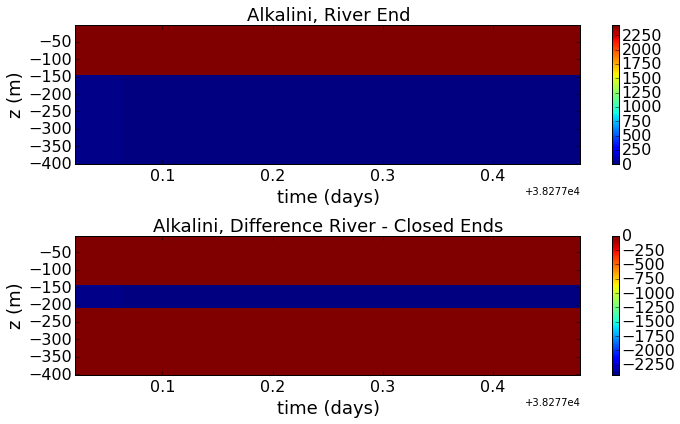

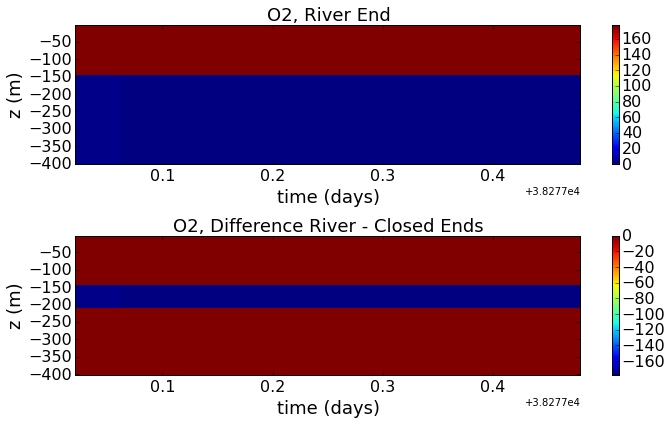

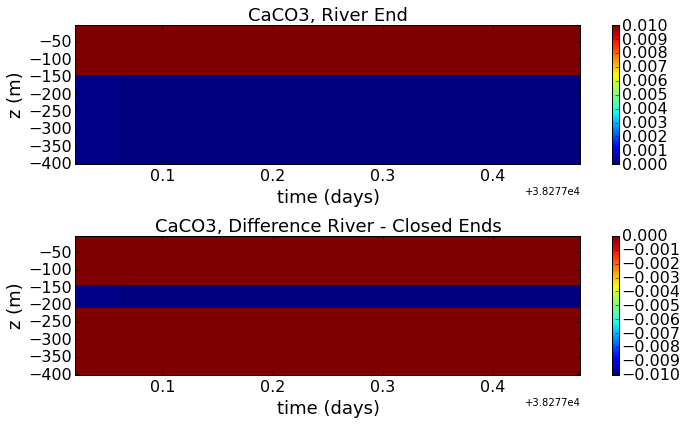

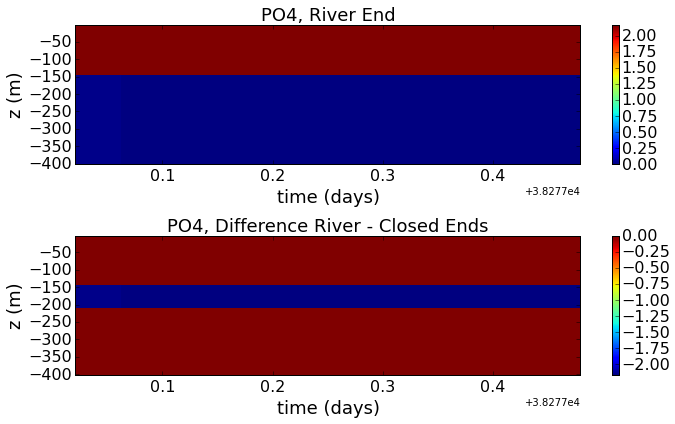

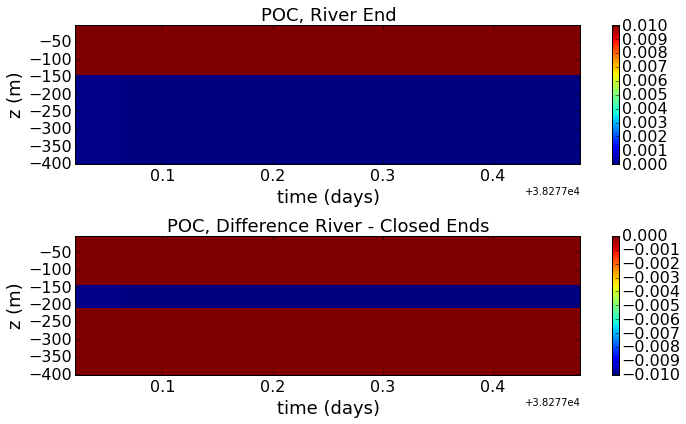

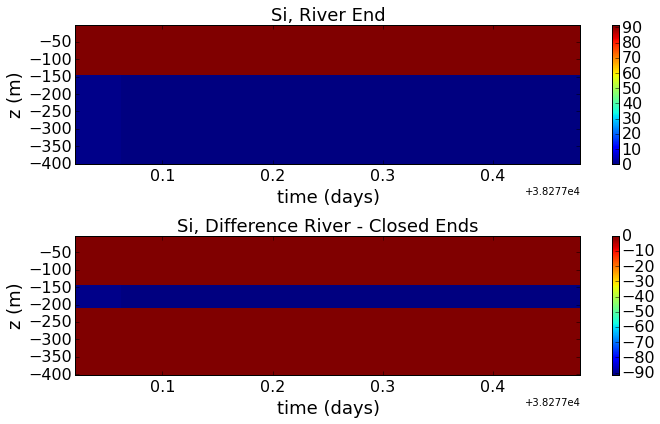

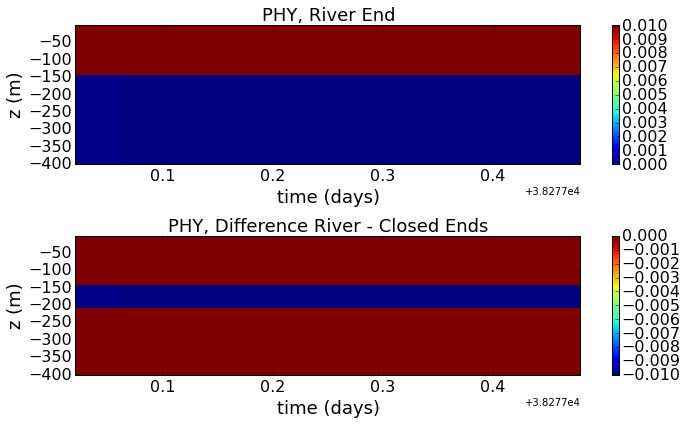

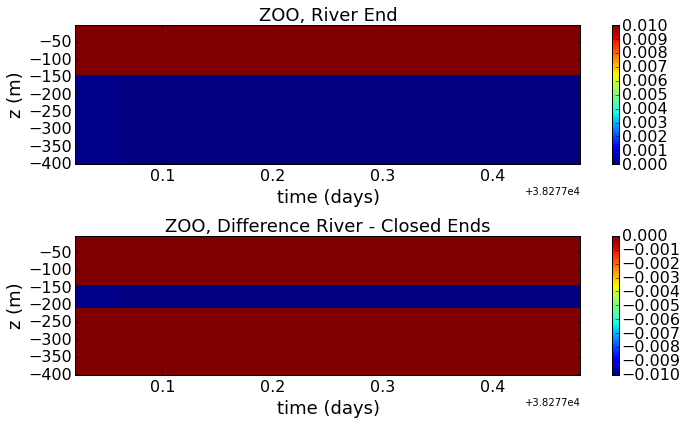

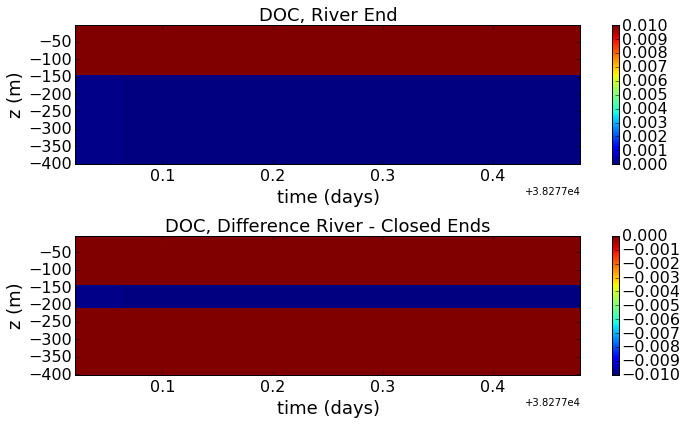

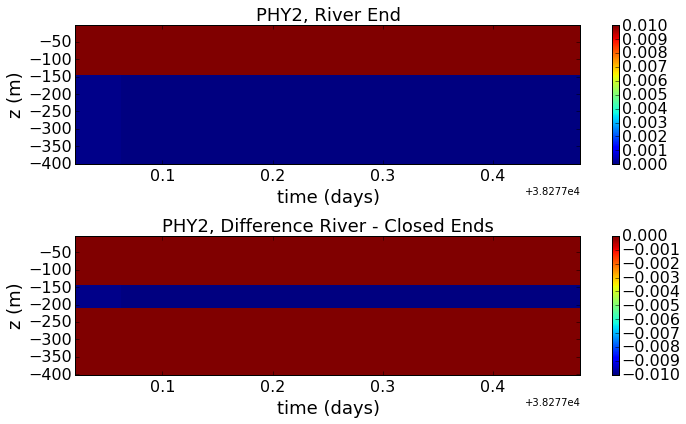

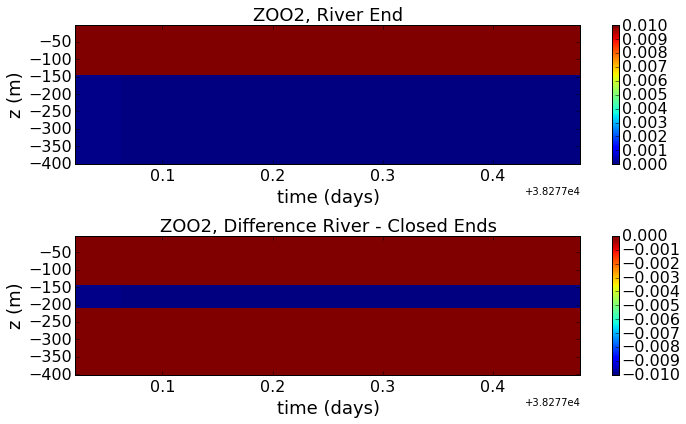

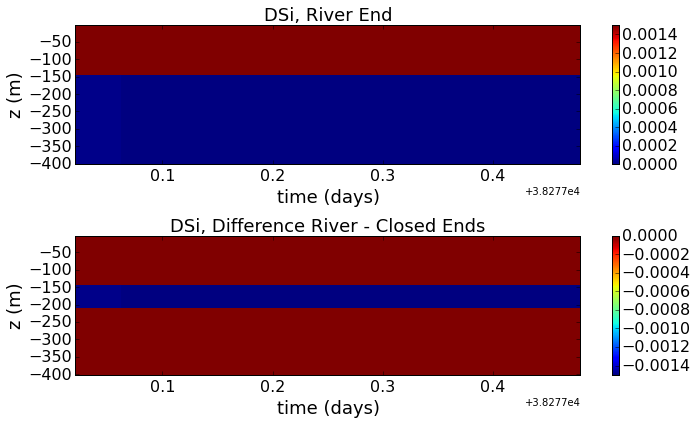

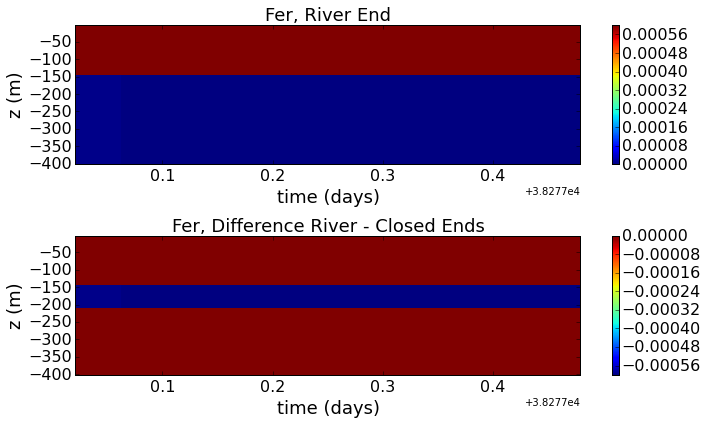

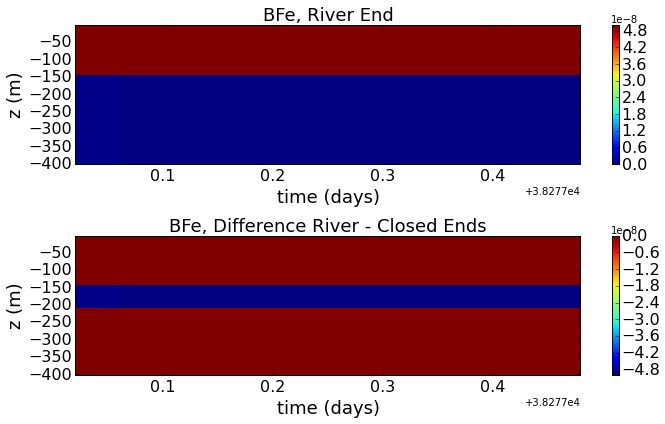

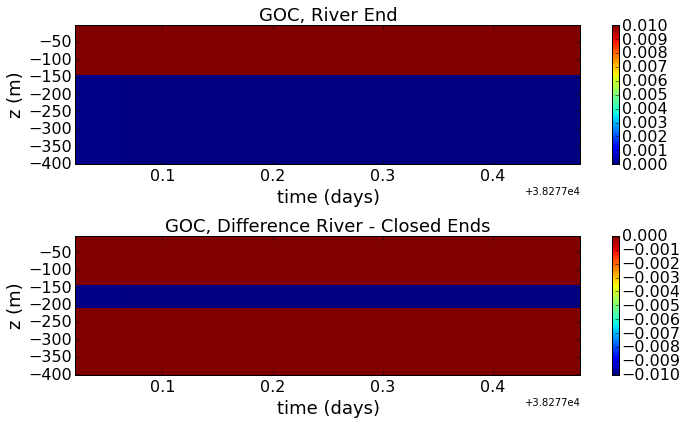

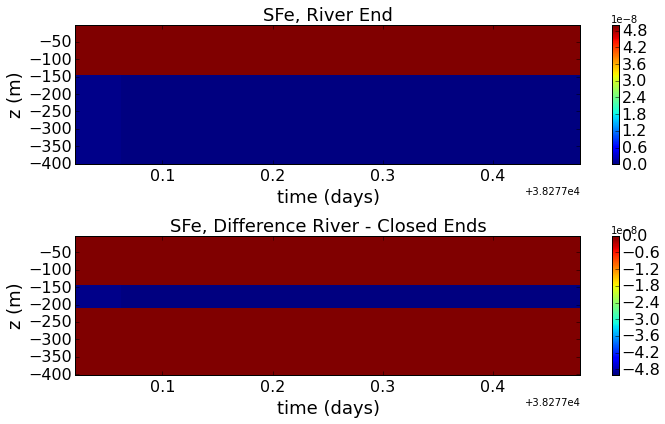

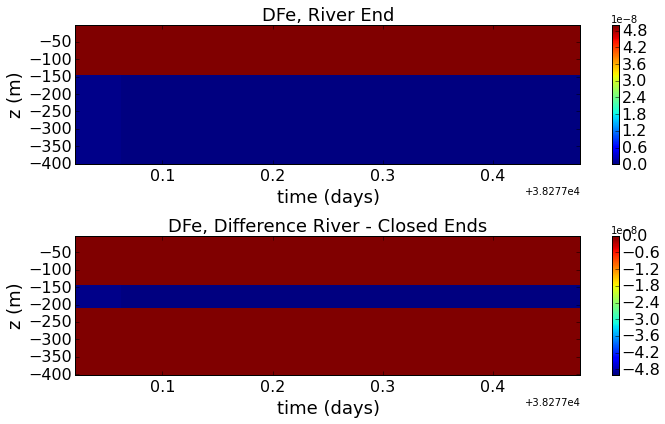

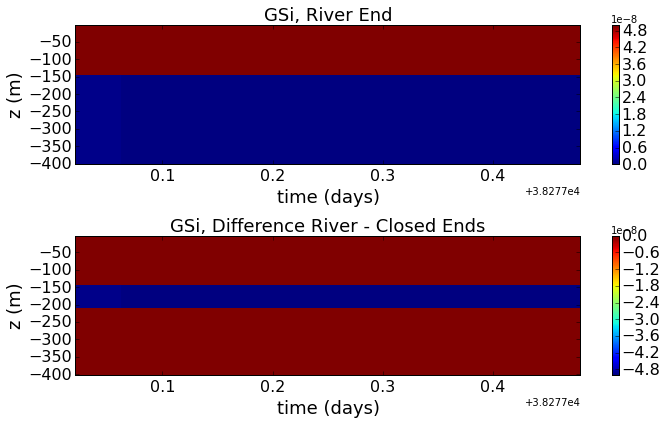

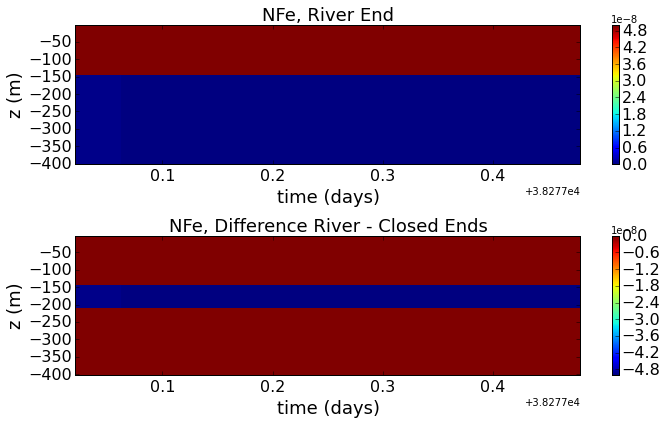

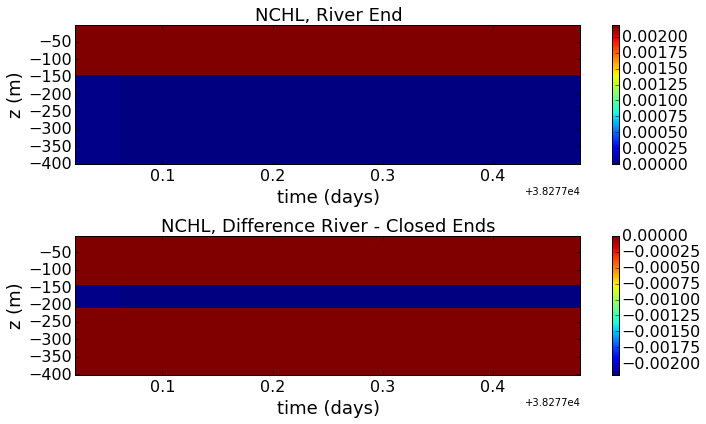

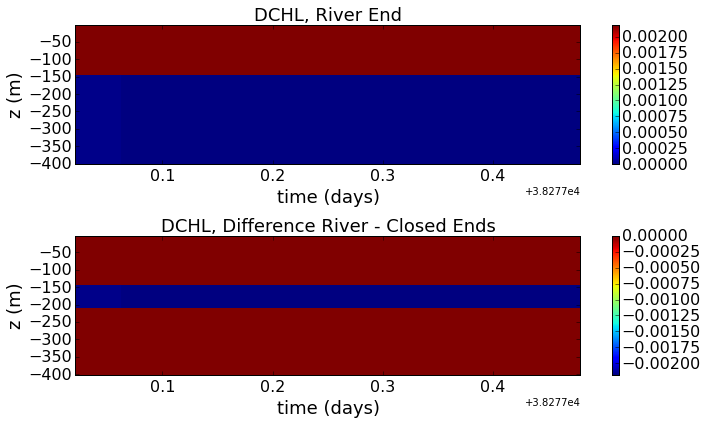

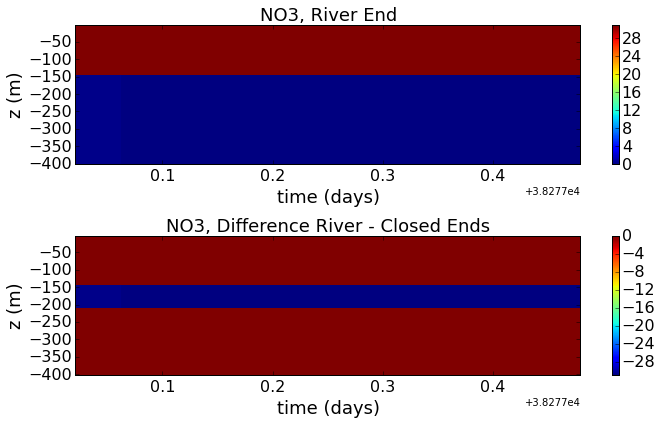

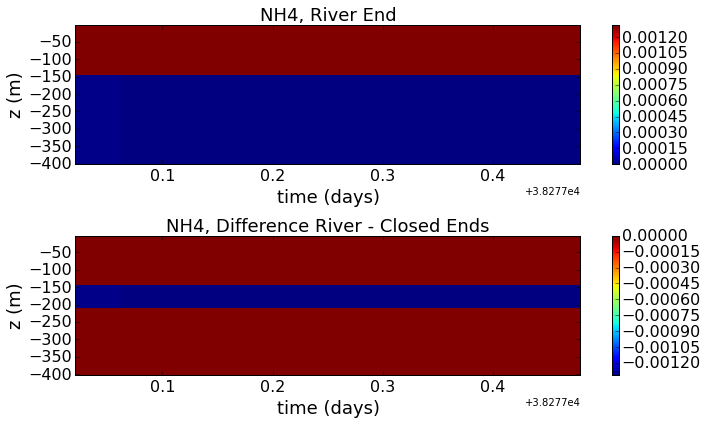

In [7]:

for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik+str(np.min(f.variables[ik])))
        mesh0=axs[0].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,1095].conj().transpose())
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('time (days)', fontsize=18)
        axs[0].set_title(ik + ', River End', fontsize=18)
        axs[0].autoscale(tight='True')
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        mesh1=axs[1].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,1095].conj().transpose()- \
                                f.variables[ik][0:e,:,5,5].conj().transpose())
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('time (days)', fontsize=18)
        axs[1].set_title(ik + ', Difference River - Closed Ends', fontsize=18)
        axs[1].autoscale(tight='True')
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()
